In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('vostok_tube.csv', sep=';')
df

,BHP,THP,WCT,LIQ,GOR,D,L,R,dH
0,"3,7523","3,7523","0,0","1,829","26,50459267359213","0,257",500,"0,00015","0,0"
1,"3,75231","3,7523","0,0","5,069","26,5046360228842","0,257",500,"0,00015","0,0"
2,"3,75231","3,7523","0,0","10,191","26,50456284957315","0,257",500,"0,00015","0,0"
3,"3,75232","3,7523","0,0","19,577","26,50462277161976","0,257",500,"0,00015","0,0"
4,"3,75233","3,7523","0,0","24,764","26,504603456630594","0,257",500,"0,00015","0,0"
...,...,...,...,...,...,...,...,...,...
2167275,"12,2047","11,2736","0,0","168,415","2781,806846183535","0,203",700,"0,00015","0,0"
2167276,"12,2457","11,2736","0,0","171,862","2781,8074967124785","0,203",700,"0,00015","0,0"
2167277,"12,317","11,2736","0,0","177,697","2781,802731616178","0,203",700,"0,00015","0,0"
2167278,"12,3192","11,2736","0,0","177,87","2781,806937651093","0,203",700,"0,00015","0,0"


In [3]:
cols = df.columns
cols = list(cols)
cols.remove('L')
for col in cols:
    df[col] = df[col].apply(lambda x: float(x.split()[0].replace(',','.')))
df

,BHP,THP,WCT,LIQ,GOR,D,L,R,dH
0,3.75230,3.7523,0.0,1.829,26.504593,0.257,500,0.00015,0.0
1,3.75231,3.7523,0.0,5.069,26.504636,0.257,500,0.00015,0.0
2,3.75231,3.7523,0.0,10.191,26.504563,0.257,500,0.00015,0.0
3,3.75232,3.7523,0.0,19.577,26.504623,0.257,500,0.00015,0.0
4,3.75233,3.7523,0.0,24.764,26.504603,0.257,500,0.00015,0.0
...,...,...,...,...,...,...,...,...,...
2167275,12.20470,11.2736,0.0,168.415,2781.806846,0.203,700,0.00015,0.0
2167276,12.24570,11.2736,0.0,171.862,2781.807497,0.203,700,0.00015,0.0
2167277,12.31700,11.2736,0.0,177.697,2781.802732,0.203,700,0.00015,0.0
2167278,12.31920,11.2736,0.0,177.870,2781.806938,0.203,700,0.00015,0.0


In [4]:
df = df.astype(float)

In [5]:
X = df.drop('BHP', axis=1)
y = df.BHP

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(X_train, y_train)

In [8]:
pred_lin = linreg.predict(X_test)
mean_squared_error(y_test, pred_lin)

636.818431753846

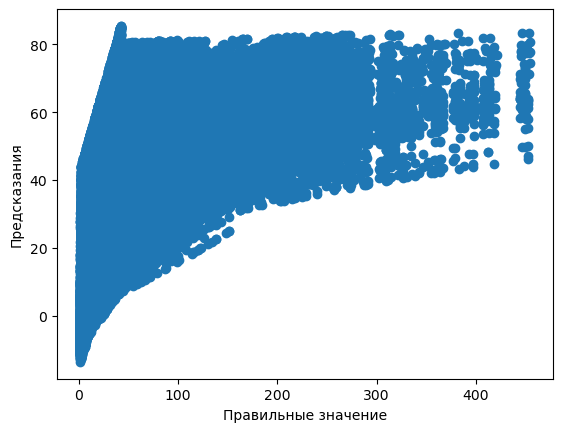

In [20]:
plt.scatter(y_test, pred_lin) 
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
#plt.axis('equal')
#plt.plot(y_test, pred_lin)
plt.show()

Desicion Tree

In [9]:
from sklearn.tree import DecisionTreeRegressor

DTree = DecisionTreeRegressor()
DTree.fit(X_train, y_train)

DecisionTreeRegressor()

In [10]:
pred_dtr = DTree.predict(X_test)
mean_squared_error(y_test, pred_dtr)

0.09379002835692835

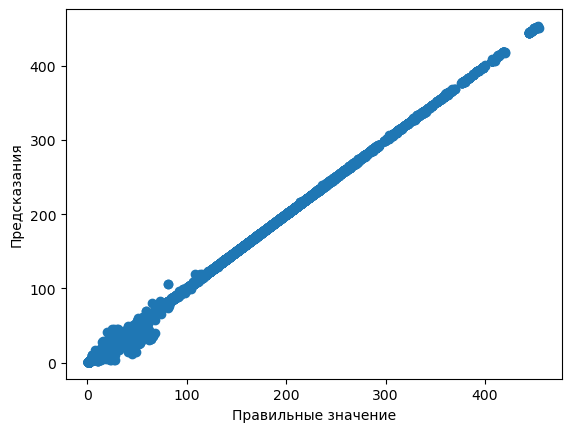

In [21]:
plt.scatter(y_test, pred_dtr) 
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
plt.show()

Нейросеть

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [34]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

C:\Users\a.e.kulishkin\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.compile(optimizer='adam', loss='mse', metrics=['mape'])

In [38]:
model.fit(X_train, y_train, batch_size = 10, epochs = 25)

Epoch 1/25
151710/151710 ━━━━━━━━━━━━━━━━━━━━ 111s 732us/step - loss: 488.2083 - mape: 39.6042
Epoch 2/25
151710/151710 ━━━━━━━━━━━━━━━━━━━━ 111s 734us/step - loss: 462.1395 - mape: 37.1855
Epoch 3/25
151710/151710 ━━━━━━━━━━━━━━━━━━━━ 114s 751us/step - loss: 446.9951 - mape: 36.4619
Epoch 4/25
151710/151710 ━━━━━━━━━━━━━━━━━━━━ 112s 739us/step - loss: 437.8542 - mape: 36.6614
Epoch 5/25
151710/151710 ━━━━━━━━━━━━━━━━━━━━ 112s 741us/step - loss: 433.6204 - mape: 36.6492
Epoch 6/25
 86455/151710 ━━━━━━━━━━━━━━━━━━━━ 49s 755us/step - loss: 435.7466 - mape: 38.2869

KeyboardInterrupt: 

In [26]:
pred = model.predict(X_test)

20319/20319 ━━━━━━━━━━━━━━━━━━━━ 12s 612us/step


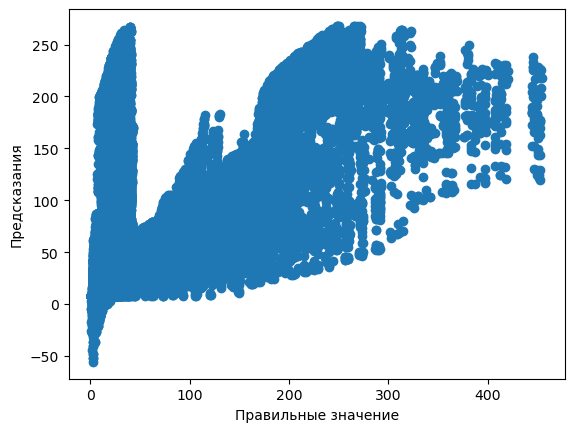

In [27]:
plt.scatter(y_test, pred) 
plt.xlabel('Правильные значение')
plt.ylabel('Предсказания')
#plt.axis('equal')
#plt.plot(y_test, pred)
plt.show()

In [30]:
error = pred - y_test
plt.hist(abs(error))
plt.xlabel("Значение ошибки")
plt.ylabel("Количество")
plt.show()

MemoryError: Unable to allocate 3.08 TiB for an array with shape (650184, 650184) and data type float64